# Importing csv 


In [151]:
import pandas as pd 
df = pd.read_csv(r'F:\netflix-data-analysis\data\netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Convert date_added to datetime

In [152]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')


In [153]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


# Cleaning data and Handling missing values 


In [154]:
df = df.drop_duplicates(subset=['title', 'release_year', 'director'])
df = df.dropna(subset=['date_added'])
df = df.fillna({'cast': 'unknown', 'country': 'unknown', 'director': 'unknown', 'rating': 'unknown'})
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0).astype('int64')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 962.2+ KB



# Clean and split genres

In [156]:
df['listed_in'] = df['listed_in'].str.split(',')
df = df.explode('listed_in')



# Normalize country names (simplified example)

In [157]:
df['country'] = df['country'].str.split(',').str[0]

# Importing visual  libraries


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Titles added per year

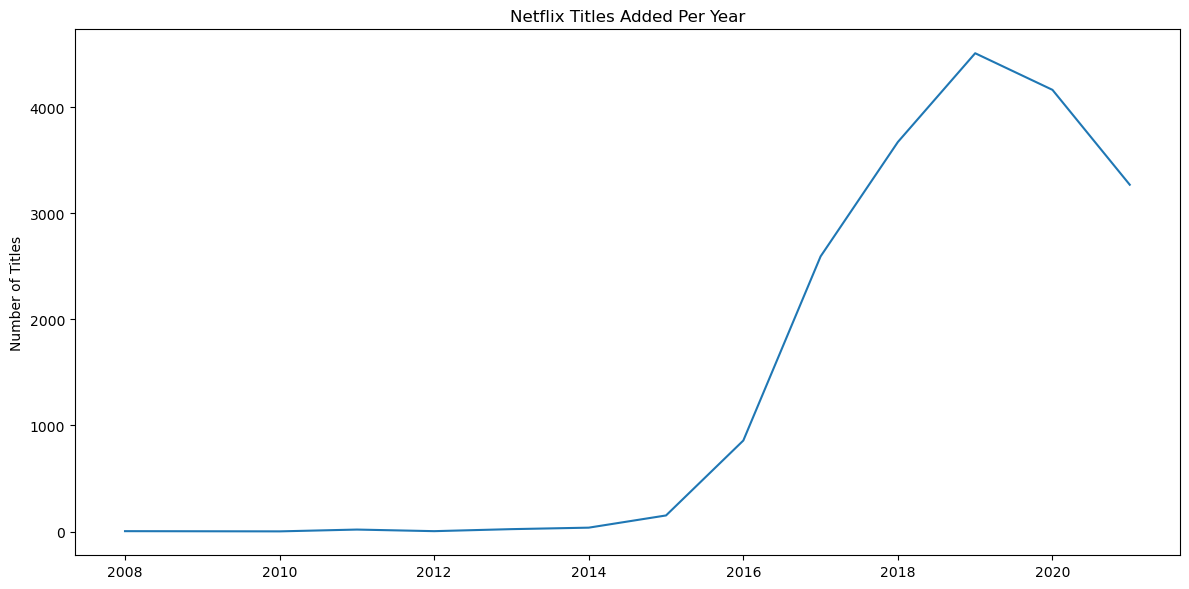

In [159]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df['year_added'].value_counts().sort_index())
plt.title('Netflix Titles Added Per Year')
plt.ylabel('Number of Titles')
plt.xlabel('')
plt.tight_layout()

# Content by country (top 10)

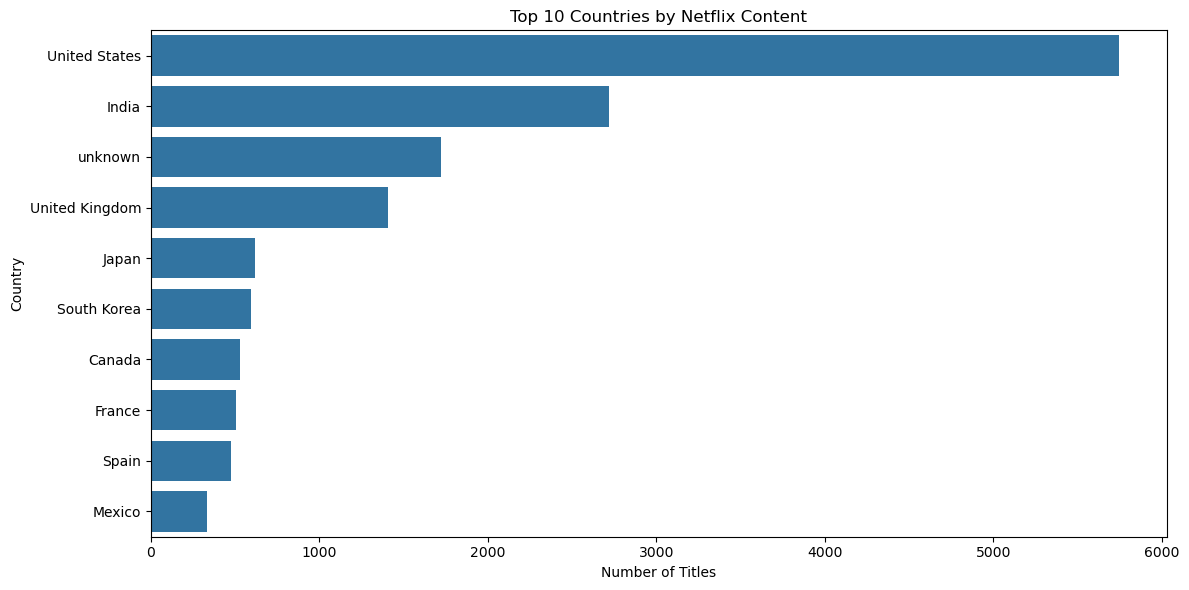

In [160]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()

# TV Shows vs Movies

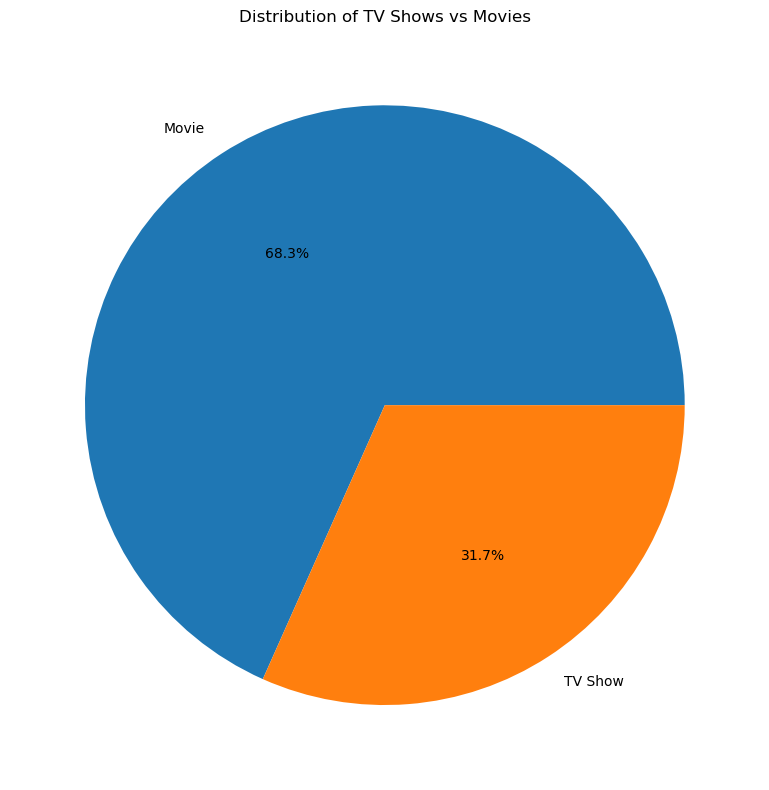

In [161]:
plt.figure(figsize=(8,8))
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of TV Shows vs Movies')
plt.ylabel('')
plt.tight_layout()

# Ratings distribution by content type

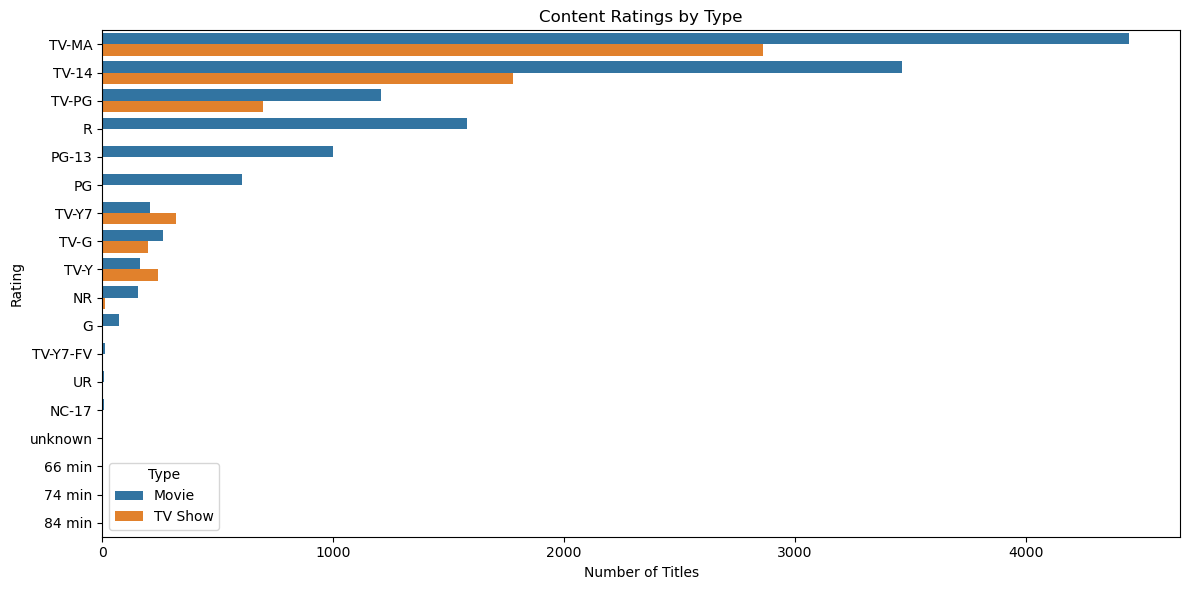

In [186]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Content Ratings by Type')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.legend(
    title='Type',
    loc='lower left',  
)
plt.tight_layout()
